# Chapter 1: Fundamentals of Reservoir Fluid Behavior
**Author:** Ade Anggi Naluriawan Santoso

**Objective:**
In this notebook, we will visualize the Pressure-Temperature (P-T) Phase Diagrams for three major reservoir fluid types:
1.  **Black Oil**
2.  **Volatile Oil**
3.  **Retrograde Gas**

These diagrams are critical for identifying the reservoir type based on the relationship between **Reservoir Temperature ($T_R$)** and the fluid's **Critical Temperature ($T_c$)**.

## 1. Key Concepts

Before plotting, we must define the boundaries of the Phase Envelope:

* **Bubble Point Curve:** The line separating the single-phase liquid region from the two-phase region. (Liquid starts bubbling).
* **Dew Point Curve:** The line separating the single-phase gas region from the two-phase region. (Gas starts condensing).
* **Critical Point ($C_p$):** The point where the Bubble Point and Dew Point curves meet. At this point, the properties of the liquid and gas are identical.
* **Cricondentherm ($T_{ct}$):** The maximum temperature at which two phases can exist.
* **Cricondenbar ($P_{cb}$):** The maximum pressure at which two phases can exist.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Global Configuration for Charts
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

def smooth_curve(x_points, y_points, num_points=300):
    """
    Helper function to smooth out the jagged lines from manual coordinates
    using B-Spline interpolation.
    """
    # Sort points just in case
    sorted_indices = np.argsort(x_points)
    x_sorted = np.array(x_points)[sorted_indices]
    y_sorted = np.array(y_points)[sorted_indices]

    # Create new domain
    x_new = np.linspace(x_sorted.min(), x_sorted.max(), num_points)
    
    # B-Spline interpolation (k=2 or 3 for smooth curves)
    spl = make_interp_spline(x_sorted, y_sorted, k=2)
    y_smooth = spl(x_new)
    
    return x_new, y_smooth

## 2. Reservoir Type 1: Black Oil

**Characteristics:**
* **Composition:** Contains a high percentage of heavy hydrocarbons ($C_{7+}$ > 20%).
* **Phase Diagram:** The phase envelope is extremely wide.
* **Temperature Relationship:** The Reservoir Temperature ($T_R$) is **far below** the Critical Temperature ($T_c$).
* **Behavior:** Even if pressure drops, the fluid stays mostly liquid, evolving only a small amount of gas.

Let's plot a schematic Black Oil envelope.

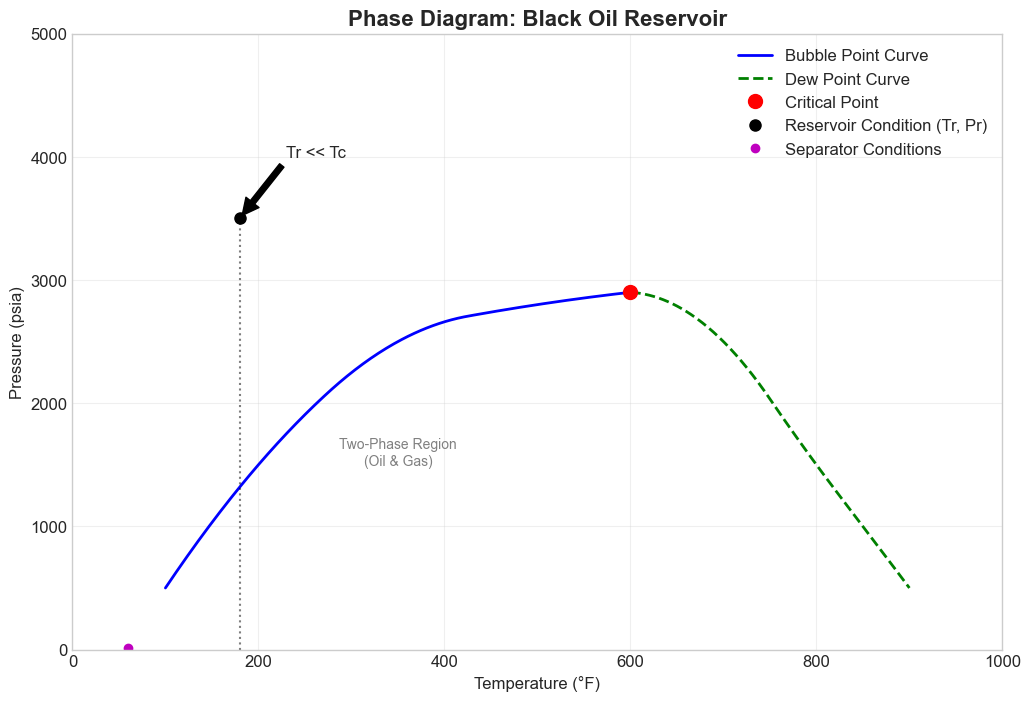

In [2]:
# --- BLACK OIL SCHEMATIC DATA ---
# These are representative coordinates to mimic Tarek Ahmed's Black Oil diagram

# Bubble Point Side (Left of Critical Point)
bp_x = [100, 200, 350, 500, 600] # Temp (F)
bp_y = [500, 1500, 2500, 2800, 2900] # Pressure (psi)

# Dew Point Side (Right of Critical Point)
dp_x = [600, 700, 800, 850, 900] # Temp (F)
dp_y = [2900, 2500, 1500, 1000, 500] # Pressure (psi)

# Reservoir Conditions (Tr << Tc)
Tr = 180  # Reservoir Temp (F)
Pr = 3500 # Initial Reservoir Pressure (psi)

# Create Plot
fig, ax = plt.subplots()

# Smooth and Plot Bubble Point Curve
x_bp, y_bp = smooth_curve(bp_x, bp_y)
ax.plot(x_bp, y_bp, 'b-', label='Bubble Point Curve', linewidth=2)

# Smooth and Plot Dew Point Curve
x_dp, y_dp = smooth_curve(dp_x, dp_y)
ax.plot(x_dp, y_dp, 'g--', label='Dew Point Curve', linewidth=2)

# Plot Critical Point
ax.plot(600, 2900, 'ro', label='Critical Point', markersize=10)

# Plot Reservoir Condition
ax.plot(Tr, Pr, 'ko', label='Reservoir Condition (Tr, Pr)', markersize=8)
ax.vlines(Tr, 0, Pr, colors='k', linestyles='dotted', alpha=0.5)

# Separator Conditions (Surface)
ax.plot(60, 14.7, 'mo', label='Separator Conditions')

# Annotation
ax.text(350, 1500, 'Two-Phase Region\n(Oil & Gas)', ha='center', fontsize=10, color='gray')
ax.annotate('Tr << Tc', xy=(Tr, Pr), xytext=(Tr+50, Pr+500),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_title('Phase Diagram: Black Oil Reservoir', fontsize=16, fontweight='bold')
ax.set_xlabel('Temperature (°F)')
ax.set_ylabel('Pressure (psia)')
ax.set_xlim(0, 1000)
ax.set_ylim(0, 5000)
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

## 3. Reservoir Type 2: Volatile Oil (High-Shrinkage Crude)

**Characteristics:**
* **Composition:** More intermediate components (Ethane, Propane) and fewer heavy ends than black oil.
* **Phase Diagram:** The envelope is narrower (smaller temperature range) than Black Oil.
* **Temperature Relationship:** The Reservoir Temperature ($T_R$) is **close to** the Critical Temperature ($T_c$), but still slightly to the left ($T_R < T_c$).
* **Behavior:** A small drop in pressure below the bubble point causes a massive release of gas (high shrinkage).

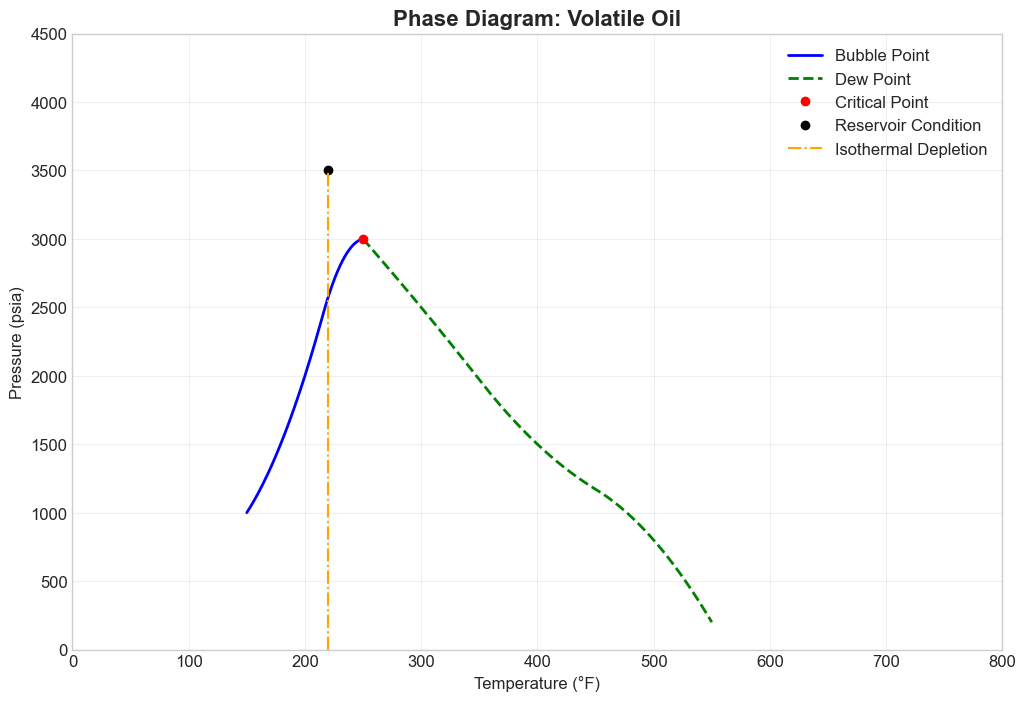

In [3]:
# --- VOLATILE OIL SCHEMATIC DATA ---
# Notice the envelope is narrower and the Critical Point is closer to Tr

# Bubble Point Side
bp_x_vo = [150, 200, 230, 250]
bp_y_vo = [1000, 2000, 2800, 3000]

# Dew Point Side
dp_x_vo = [250, 300, 400, 500, 550]
dp_y_vo = [3000, 2500, 1500, 800, 200]

# Reservoir Conditions (Tr close to Tc)
Tr_vo = 220
Pr_vo = 3500

fig, ax = plt.subplots()

x_bp, y_bp = smooth_curve(bp_x_vo, bp_y_vo)
x_dp, y_dp = smooth_curve(dp_x_vo, dp_y_vo)

ax.plot(x_bp, y_bp, 'b-', label='Bubble Point', linewidth=2)
ax.plot(x_dp, y_dp, 'g--', label='Dew Point', linewidth=2)
ax.plot(250, 3000, 'ro', label='Critical Point')
ax.plot(Tr_vo, Pr_vo, 'ko', label='Reservoir Condition')

# Visualizing the Isotherms (Vertical Line Drop)
ax.vlines(Tr_vo, 0, Pr_vo, colors='orange', linestyles='dashdot', label='Isothermal Depletion')

ax.set_title('Phase Diagram: Volatile Oil', fontsize=16, fontweight='bold')
ax.set_xlabel('Temperature (°F)')
ax.set_ylabel('Pressure (psia)')
ax.set_xlim(0, 800)
ax.set_ylim(0, 4500)
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

## 4. Reservoir Type 3: Retrograde Gas Condensate

**Characteristics:**
* **Composition:** Contains fewer heavy hydrocarbons, mostly Methane and intermediates.
* **Phase Diagram:** The Critical Point is on the left side of the envelope.
* **Temperature Relationship:** The Reservoir Temperature lies **between** the Critical Temperature ($T_c$) and the Cricondentherm ($T_{ct}$).
    $$T_c < T_R < T_{ct}$$
* **Behavior (Retrograde Condensation):** 1. The fluid starts as a gas (single phase) at high pressure.
    2. As pressure drops (isothermal depletion), it hits the **Dew Point curve**.
    3. Unexpectedly, **liquid condenses** as pressure drops further (this is the "retrograde" behavior).
    4. If pressure drops very low, the liquid revaporizes.

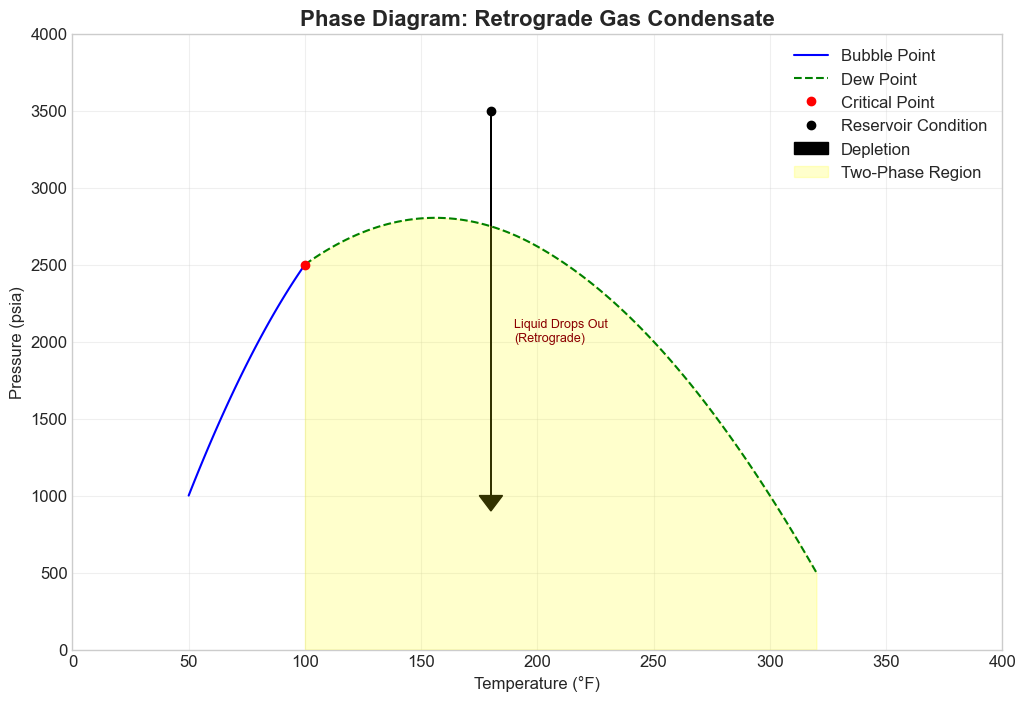

In [4]:
# --- RETROGRADE GAS SCHEMATIC DATA ---

# Bubble Point Side (Steep on the left)
bp_x_rg = [50, 80, 100]
bp_y_rg = [1000, 2000, 2500]

# Dew Point Side (Large loop to the right)
dp_x_rg = [100, 150, 250, 300, 320]
dp_y_rg = [2500, 2800, 2000, 1000, 500]

# Reservoir Conditions (Between Tc and Cricondentherm)
Tc_rg = 100      # Critical Temp
Tct_rg = 320     # Cricondentherm
Tr_rg = 180      # Reservoir Temp (Right in the middle)
Pr_rg = 3500     # Initial Pressure

fig, ax = plt.subplots()

x_bp, y_bp = smooth_curve(bp_x_rg, bp_y_rg, num_points=100)
x_dp, y_dp = smooth_curve(dp_x_rg, dp_y_rg, num_points=100)

ax.plot(x_bp, y_bp, 'b-', label='Bubble Point')
ax.plot(x_dp, y_dp, 'g--', label='Dew Point')
ax.plot(Tc_rg, 2500, 'ro', label='Critical Point')
ax.plot(Tr_rg, Pr_rg, 'ko', label='Reservoir Condition')

# Show Depletion Path
ax.arrow(Tr_rg, Pr_rg, 0, -2500, head_width=10, head_length=100, fc='k', ec='k', label='Depletion')

# Highlight the Retrograde Region
ax.fill_between(x_dp, y_dp, color='yellow', alpha=0.2, label='Two-Phase Region')
ax.text(Tr_rg + 10, 2000, 'Liquid Drops Out\n(Retrograde)', color='darkred', fontsize=9)

ax.set_title('Phase Diagram: Retrograde Gas Condensate', fontsize=16, fontweight='bold')
ax.set_xlabel('Temperature (°F)')
ax.set_ylabel('Pressure (psia)')
ax.set_xlim(0, 400)
ax.set_ylim(0, 4000)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

plt.show()

## Conclusion

By plotting these schematic diagrams, we can summarize the Tarek Ahmed classification rules:

| Reservoir Type | Relationship | Key Feature |
| :--- | :--- | :--- |
| **Black Oil** | $T_R \ll T_c$ | Wide envelope, low shrinkage. |
| **Volatile Oil** | $T_R \approx T_c$ (but $<$) | Narrow envelope, high shrinkage. |
| **Retrograde Gas** | $T_c < T_R < T_{ct}$ | Liquid forms as pressure drops. |
| **Wet Gas** | $T_R > T_{ct}$ | Stays gas in reservoir, liquid forms at surface. |
| **Dry Gas** | $T_R \gg T_{ct}$ | Stays gas everywhere (reservoir & surface). |

In the next notebook (**02_fluid_properties.ipynb**), we will start calculating actual fluid properties like **Z-factor** and **Viscosity** using Python functions.